**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
library(pheatmap)
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


In [4]:
#txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
#vec = dir(txt_fdiry)
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_REGION = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


## Import data

In [5]:
### init
txt_assay  = "STARR_ATAC_K562_Reddy_KS91"

###
lst = lapply(VEC_TXT_REGION, function(txt_region){
    ### set file directory
    txt_fdiry = file.path(
        FD_RES, "region_coverage_fcc", 
        txt_region, 
        txt_assay, 
        "overlap_score",
        "summary"
    )
    txt_fname = "result.coverage.summary.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 150041     10

$fcc_astarr_macs_input_union
[1] 246852     10



Chrom,ChromStart,ChromEnd,Region,Input_DESeq,Input_FPKM,Input_TPM,Output_DESeq,Output_FPKM,Output_TPM
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10038,10405,chr1:10038-10405,96.32888,0.004164383,3.940038,22.18751,0.0007357323,0.7181993
chr1,14282,14614,chr1:14282-14614,62.86738,0.003003325,2.841707,61.74133,0.0022620843,2.2104314
chr1,16025,16338,chr1:16025-16338,79.89682,0.004048701,3.830812,33.38053,0.0012867327,1.2597204


## Explore

In [6]:
txt = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_import
dat = lst[[txt]]
dat_region_score_import = dat
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,Input_DESeq,Input_FPKM,Input_TPM,Output_DESeq,Output_FPKM,Output_TPM
chr1,10015,10442,chr1:10015-10442,99.35528,0.0030830,3.160573,25.74094,0.0006187,0.6571619
chr1,14253,14645,chr1:14253-14645,64.40633,0.0021763,2.231167,74.31226,0.0019510,2.0734986
chr1,16015,16477,chr1:16015-16477,89.10514,0.0025549,2.619283,40.97085,0.0009085,0.9661250


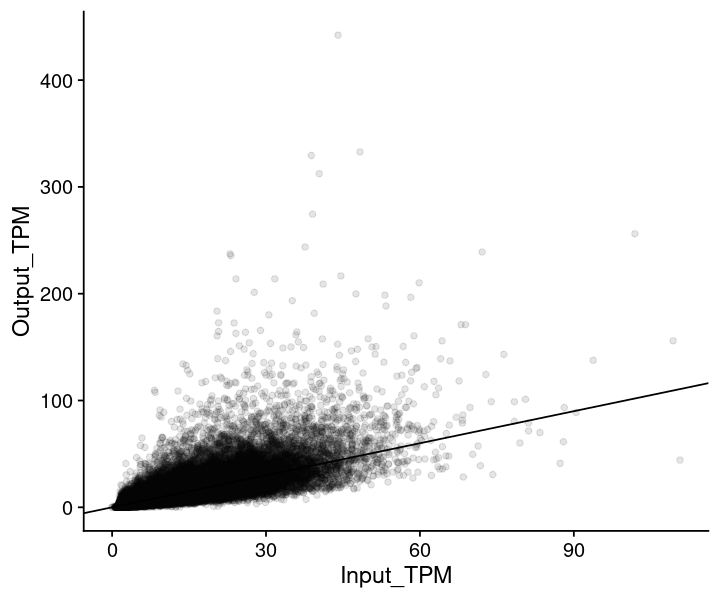

In [15]:
dat = dat_region_score_import
idx1 = "Input_TPM"
idx2 = "Output_TPM"

gpt = ggplot(dat, aes(x=.data[[idx1]], y=.data[[idx2]])) + 
        geom_point(alpha = 0.1) +
        geom_abline(intercept = 0, slope = 1) +
        #scale_x_log10() +
        #scale_y_log10() +
        theme_cowplot()

options(repr.plot.height=5, repr.plot.width=6)
print(gpt)